# 라이브러리 호출

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input,Dense,MaxPool2D,Conv2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

from sklearn.model_selection import train_test_split

# 데이터 불러오기

In [4]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [5]:
train_pix = train.drop(['index','label'],axis=1)

In [6]:
test = pd.read_csv('/content/test.csv')
test_pix = test.drop(['index'],axis=1)

# 전처리

## 결측치 확인

In [7]:
train_pix.isna().sum()

px1      0
px2      0
px3      0
px4      0
px5      0
        ..
px780    0
px781    0
px782    0
px783    0
px784    0
Length: 784, dtype: int64

In [8]:
test_pix.isna().sum()

px1      0
px2      0
px3      0
px4      0
px5      0
        ..
px780    0
px781    0
px782    0
px783    0
px784    0
Length: 784, dtype: int64

## 데이터 확인

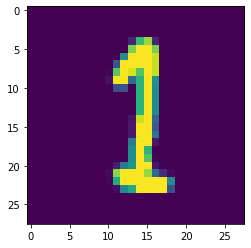

In [9]:
plt.imshow(np.array(train_pix.iloc[2858,:]).reshape(28,28), interpolation='nearest')
plt.show()

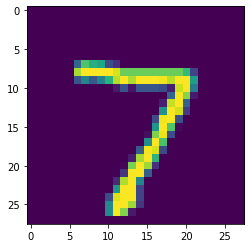

In [10]:
plt.imshow(np.array(test_pix.iloc[0,:]).reshape(28,28), interpolation='nearest')
plt.show()

# shape 변환

In [11]:
train_data = np.array(train_pix).reshape(-1,28,28,1)
print(train_data.shape)

(60000, 28, 28, 1)


In [12]:
test_data = np.array(test_pix).reshape(-1,28,28,1)
print(test_data.shape)

(10000, 28, 28, 1)


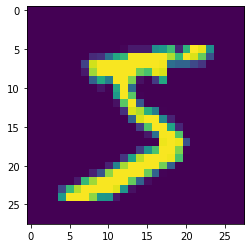

In [13]:
plt.imshow(np.array(train_data[0]).reshape(28,28), interpolation='nearest')
plt.show()

In [14]:
train.loc[0,'label']

5

#데이터 분리

In [15]:
x_train, x_val, y_train, y_val = train_test_split(train_data,train['label'],test_size=0.3,random_state=2022)

## scaling

In [16]:
max_num, min_num = x_train.max(),x_train.min()

x_train = (x_train - min_num) / (max_num - min_num)
x_val = (x_val - min_num) / (max_num - min_num)


## one hot encoding

In [17]:
n_class = len(np.unique(y_train))

y_train = to_categorical(y_train,n_class)
y_val = to_categorical(y_val,n_class)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 모델링

In [44]:
# accuracy 0.949
clear_session()

il = Input((28,28,1))

hl = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(il)
bl = BatchNormalization()(hl)
hl = MaxPool2D(pool_size=(2,2))(bl)
hl = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(hl)
hl = MaxPool2D(pool_size=(2,2))(hl)
bl = BatchNormalization()(hl)

fl = Flatten()(bl)
dl = Dropout(0.25)(fl)
hl = Dense(128,'relu')(dl)
ol = Dense(n_class,'softmax')(hl)

model = Model(il,ol)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0     

In [67]:
#accuracy : 0.9905
clear_session()

il = Input((28,28,1))
hl = Conv2D(filters=32,kernel_size=(3,3),activation='relu')(il)
hl = Conv2D(filters=64,kernel_size=(3,3),activation='relu')(hl)
hl = MaxPool2D(pool_size=(2,2))(hl)
hl = Dropout(0.25)(hl)
fl = Flatten()(hl)
hl = Dense(256,'relu')(fl)
hl = Dropout(0.5)(hl)
ol = Dense(n_class,'softmax')(hl)

model = Model(il,ol)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                             

In [64]:
es = EarlyStopping(patience = 5,
                   verbose=1,
                   restore_best_weights=True)

In [68]:
model.fit(x_train,y_train,128,100,1,[es],0.2)

Epoch 1/100
263/263 [==============================] - 3s 11ms/step - loss: 0.4378 - accuracy: 0.8630 - val_loss: 0.1012 - val_accuracy: 0.9686
Epoch 2/100
263/263 [==============================] - 3s 10ms/step - loss: 0.1332 - accuracy: 0.9629 - val_loss: 0.0670 - val_accuracy: 0.9793
Epoch 3/100
263/263 [==============================] - 3s 10ms/step - loss: 0.0897 - accuracy: 0.9754 - val_loss: 0.0577 - val_accuracy: 0.9835
Epoch 4/100
263/263 [==============================] - 3s 10ms/step - loss: 0.0743 - accuracy: 0.9788 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 5/100
263/263 [==============================] - 3s 10ms/step - loss: 0.0595 - accuracy: 0.9832 - val_loss: 0.0444 - val_accuracy: 0.9875
Epoch 6/100
263/263 [==============================] - 3s 10ms/step - loss: 0.0506 - accuracy: 0.9855 - val_loss: 0.0479 - val_accuracy: 0.9873
Epoch 7/100
263/263 [==============================] - 3s 10ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0434 - val_accuracy:

In [41]:
pred = model.predict(x_val)

pred_y = pred.argmax(axis=1)
real_y = y_val.argmax(axis=1)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(real_y,pred_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1780
           1       1.00      0.99      0.99      2029
           2       0.99      0.99      0.99      1836
           3       0.99      0.99      0.99      1872
           4       0.99      0.99      0.99      1785
           5       0.99      0.98      0.99      1629
           6       0.99      1.00      0.99      1783
           7       0.98      0.99      0.99      1835
           8       0.99      0.98      0.99      1704
           9       0.99      0.98      0.98      1747

    accuracy                           0.99     18000
   macro avg       0.99      0.99      0.99     18000
weighted avg       0.99      0.99      0.99     18000



In [69]:
score = model.evaluate(x_val,y_val,verbose=0)
print('test loss : ',score[0])
print('test acc : ',score[1])

test loss :  0.0442037358880043
test acc :  0.9890000224113464


# 예측 데이터 출력

In [59]:
test_pred = model.predict(test_data)

In [60]:
test_pred = test_pred.argmax(axis=1)

In [61]:
dic = {'index' : test['index'],
       'label' : test_pred }

df_pred = pd.DataFrame(dic)

In [62]:
df_pred.to_csv('/content/submission.csv',index=False)